In [1]:
import numpy as np
import cv2
from scipy.fftpack import fft, ifft, dct, idct, fft2, ifft2, fftshift
import pywt
from skimage.metrics import peak_signal_noise_ratio
import matplotlib.pyplot as plt

%matplotlib inline

# No 2

In [2]:
orginal_plane_img = cv2.imread('1.bmp')

## Define 2D DCT and IDCT

In [3]:
def dct2(a):
    return dct( dct( a, axis=0, norm='ortho'), axis=1, norm='ortho')

def idct2(a):
    return idct( idct( a, axis=0, norm='ortho'), axis=1, norm='ortho')

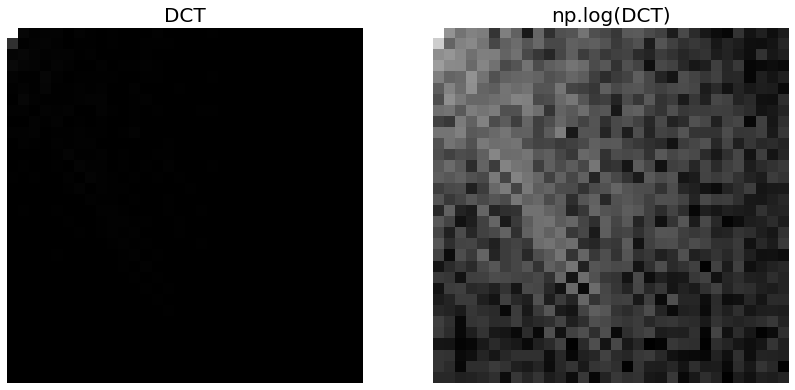

In [4]:
dct_transform_plane = dct2(orginal_plane_img)
dct_transform_plane1 = cv2.cvtColor(np.float32(np.abs(dct_transform_plane)), cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(14,8))

plt.subplot(121)
plt.imshow(dct_transform_plane1, 'gray')
plt.title('DCT', size=20)
plt.axis('off')

plt.subplot(122)
plt.imshow(np.log(1 + dct_transform_plane1), 'gray')
plt.title('np.log(DCT)', size=20)
plt.axis('off')

plt.show()

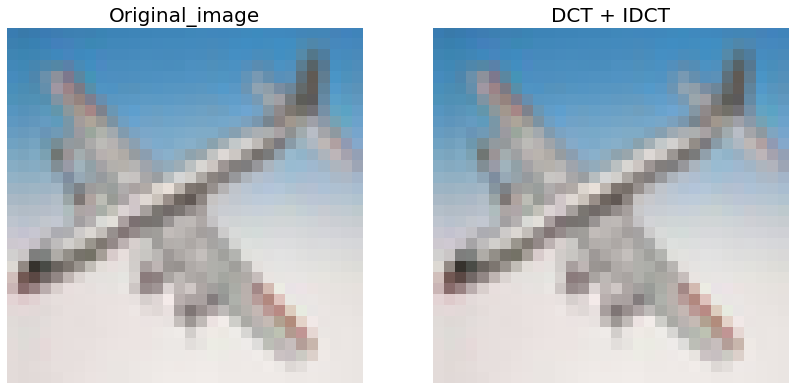

In [5]:
compressed_plane = idct2(dct_transform_plane)

fig , ax = plt.subplots(1,2, figsize=(14,8))
ax[0].imshow(cv2.cvtColor(orginal_plane_img, cv2.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title('Original_image', size=20)
ax[1].imshow(cv2.cvtColor(np.uint8(compressed_plane), cv2.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title('DCT + IDCT', size=20)
plt.show()

## Define 2D FFT and IFFT by using scipy

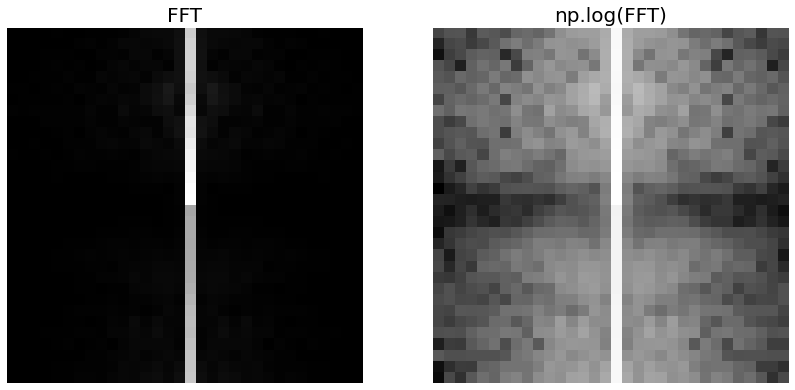

In [6]:
scipy_fft_transform_plane = fft2(orginal_plane_img)
scipy_fft_transform_plane1 = fftshift(scipy_fft_transform_plane)
scipy_fft_transform_plane1 = cv2.cvtColor(np.float32(np.abs(scipy_fft_transform_plane1)), cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(14,8))

plt.subplot(121)
plt.imshow(scipy_fft_transform_plane1, 'gray')
plt.title('FFT', size=20)
plt.axis('off')

plt.subplot(122)
plt.imshow(np.log(1 + scipy_fft_transform_plane1), 'gray')
plt.title('np.log(FFT)', size=20)
plt.axis('off')

plt.show()

<ipython-input-7-d8ddd4ca4ea0>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  ax[1].imshow(cv2.cvtColor(np.uint8(scipy_fft_compressed_plane), cv2.COLOR_BGR2RGB))


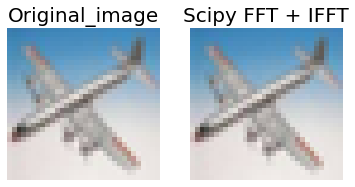

In [7]:
scipy_fft_compressed_plane = ifft2(scipy_fft_transform_plane)

fig , ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(orginal_plane_img, cv2.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title('Original_image', size=20)
ax[1].imshow(cv2.cvtColor(np.uint8(scipy_fft_compressed_plane), cv2.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title('Scipy FFT + IFFT', size=20)
plt.show()

## Define 2D FFT and IFFT by using Numpy

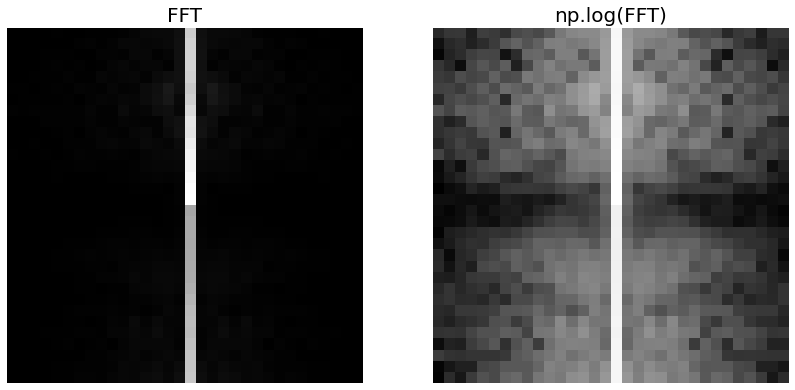

In [8]:
np_fft_transform_plane = np.fft.fft2(orginal_plane_img, norm='ortho')
np_fft_transform_plane_img = np.fft.fftshift(np_fft_transform_plane)
np_fft_transform_plane1 = cv2.cvtColor(np.float32(np.abs(np_fft_transform_plane_img)), cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(14,8))

plt.subplot(121)
plt.imshow(np_fft_transform_plane1, 'gray')
plt.title('FFT', size=20)
plt.axis('off')

plt.subplot(122)
plt.imshow(np.log(1 + np_fft_transform_plane1), 'gray')
plt.title('np.log(FFT)', size=20)
plt.axis('off')

plt.show()

## ‫کنید‪.‬‬ ‫مرتب‬ ‫کوچک‬ ‫به‬ ‫بزرگ‬ ‫از‬ ‫را‬ ‫حاصل‬ ‫ضرایب‬ ‫مطلق‬ ‫قدر‬ ‫تصویر‬ ‫دو‬ ‫از‬ ‫هرکدام‬ ‫برای‬

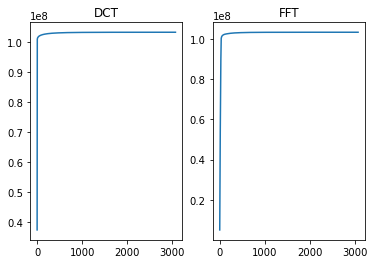

For fft = 315456947809.8228
for DCt = 316669850870.0958


In [9]:
dct_sorted = np.sort(np.abs(dct_transform_plane.flatten()))[::-1]
fft_sorted = np.sort(np.abs(np_fft_transform_plane.flatten()))[::-1]

plt.subplot(121)
plt.plot(np.cumsum(np.power(dct_sorted, 2)))
plt.title('DCT')

plt.subplot(122)
plt.plot(np.cumsum(np.power(fft_sorted, 2)))
plt.title('FFT')

plt.show()


print("For fft = " + str(np.cumsum(np.power(fft_sorted, 2)).sum()))
print("for DCt = " + str(np.cumsum(np.power(dct_sorted, 2)).sum()))

# Qustion 3

In [10]:
img2 = cv2.imread('2.jpg', 0)

img2_dct = dct2(img2)

<img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-fcafcde59c5df351d4fae6e8be1f4773_l3.svg" width=400/>

In [11]:
def distance(point1,point2):
    return np.sqrt(np.power((point1[0]-point2[0]),2) + np.power((point1[1]-point2[1]),2))

def butterworth_LowPass(D0,img,n):
    btlpf = (np.zeros_like(img))

    rows, cols = img.shape
    center = (0, 0)
    
    for x in range(cols):
        for y in range(rows):
            btlpf[y,x] = 1/(1 + np.power((distance((y,x),center)/D0), (2*n)))
    return btlpf

In [12]:
low_pass_filter = butterworth_LowPass(150, img2, 70)
compressed_dct_img2 = idct2(img2_dct * low_pass_filter)

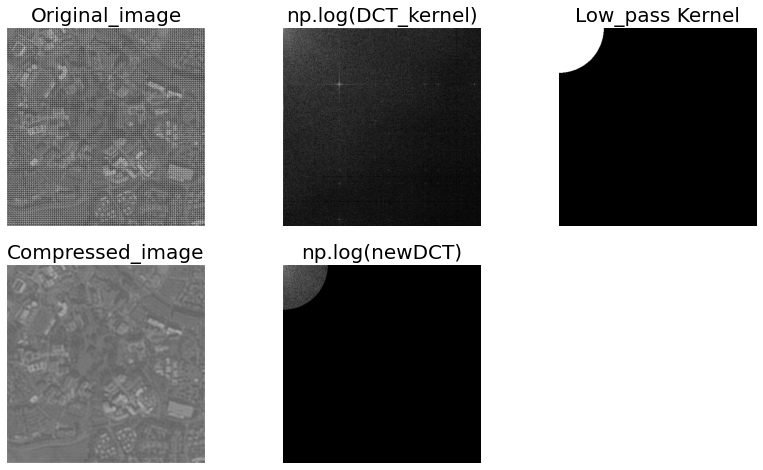

In [13]:
plt.figure(figsize=(14,8))

plt.subplot(231)
plt.imshow(img2, 'gray')
plt.axis('off')
plt.title('Original_image', size=20)

plt.subplot(232)
plt.imshow(np.log(1+np.abs(img2_dct)), 'gray')
plt.axis('off')
plt.title('np.log(DCT_kernel)', size=20)

plt.subplot(233)
plt.imshow(low_pass_filter, 'gray')
plt.axis('off')
plt.title('Low_pass Kernel', size=20)

plt.subplot(234)
plt.imshow(compressed_dct_img2, 'gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Compressed_image', size=20)

plt.subplot(235)
plt.imshow(np.log(1 + np.abs(dct2(compressed_dct_img2))), 'gray')
plt.axis('off')
plt.title('np.log(newDCT)', size=20)

plt.show()

# Qestion 4

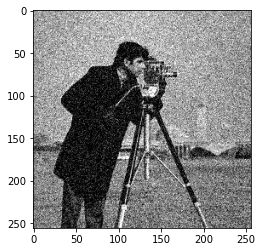

In [14]:
img3 = cv2.imread('3.bmp', 0)
img4 = cv2.imread('4.bmp', 0)
plt.imshow(img3, 'gray', vmin=0, vmax=255)
plt.show()

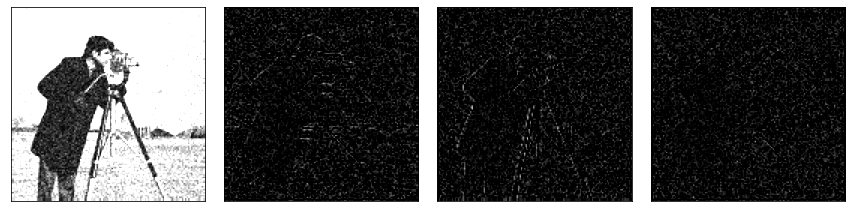

In [15]:
coeffs2 = pywt.dwt2(img3, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, cmap=plt.cm.gray, vmin=0, vmax=255)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

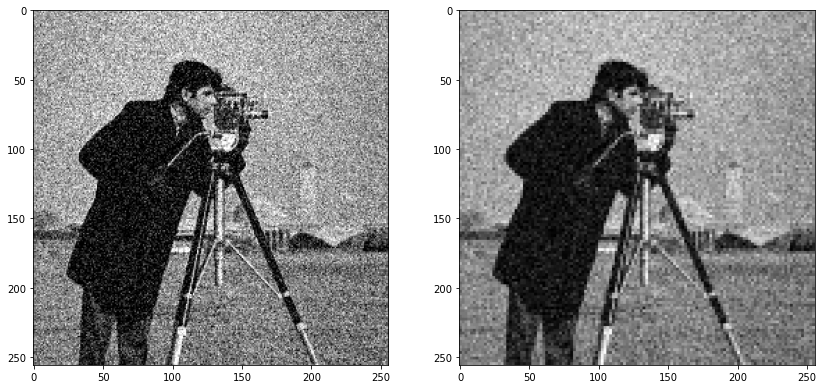

In [16]:
coeffs = pywt.dwt2(img3, 'haar')
LL, (LH, HL, HH) = coeffs
new_coeffs = LL, (np.zeros_like(LH), np.zeros_like(HL), np.zeros_like(HH))

LL, (LH, HL, HH) = new_coeffs

img_level1 = pywt.idwt2(new_coeffs, 'haar')

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(img3, 'gray', vmin=0, vmax=255)

plt.subplot(122)
plt.imshow(img_level1, 'gray', vmin=0, vmax=255)

plt.show()

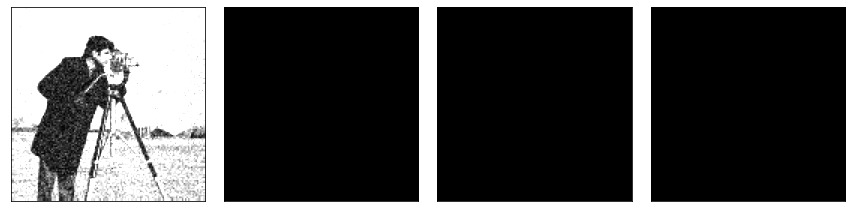

In [17]:
coeffs2 = pywt.dwt2(img_level1, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, 'gray', vmin=0, vmax=255)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

## PSNR(3.bmp, 4.bmp)

In [18]:
peak_signal_noise_ratio(img3, img4)

17.528201044477505

## PSNR(new_img, 4.bmp)

In [19]:
peak_signal_noise_ratio(np.uint8(img_level1), img4)

21.314561248681567

## n-level decomposition

In [20]:
coeffs_n = list()
ll_n = list()
sub_n = list()

img = img3

n_level = np.int(np.log(img.shape[0]))

for i in range(n_level):
    LL, (LH, HL, HH) = pywt.dwt2(img, 'haar')
    ll_n.append(LL)
    sub_n.append((LH, HL, HH))
    img = LL

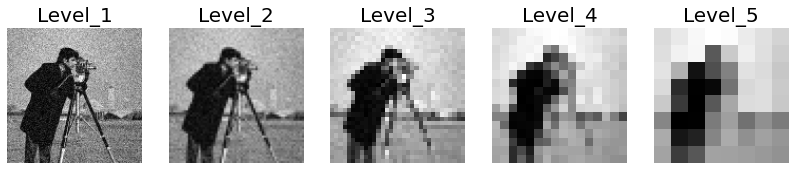

In [21]:
n_level = np.int(np.log(img3.shape[0]))

plt.figure(figsize=(14,8))
for i in range(n_level):
    plt.subplot(1,n_level,i+1)
    plt.imshow(ll_n[i], 'gray')
    plt.axis('off')
    plt.title('Level_' + str(i+1), size=20)
    
plt.show()